# Correlation Analysis and Feature Selection of Breast Cancer Study

## Data Source and Reference:
https://www.kaggle.com/raghadalharbi/breast-cancer-gene-expression-profiles-metabric <br>
https://www.nature.com/articles/s41523-018-0056-8 <br>
https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5461908/ <br>
https://www.cbioportal.org/study/summary?id=brca_metabric

### 1904 breast cancer patients
- 30 clinical attributes (not include patient id)
- m-RNA levels z-score for 489 genes
- mutation in 173 genes

In [ ]:
# pip install seaborn

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("METABRIC_RNA_Mutation.csv")
df.head(50)

/opt/anaconda3/envs/PythonAdv/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (678,688,690,692) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,patient_id,age_at_diagnosis,type_of_breast_surgery,cancer_type,cancer_type_detailed,cellularity,chemotherapy,pam50_+_claudin-low_subtype,cohort,er_status_measured_by_ihc,...,mtap_mut,ppp2cb_mut,smarcd1_mut,nras_mut,ndfip1_mut,hras_mut,prps2_mut,smarcb1_mut,stmn2_mut,siah1_mut
0,0,75.65,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,NaN,0,claudin-low,1,Positve,...,0,0,0,0,0,0,0,0,0,0
1,2,43.19,BREAST CONSERVING,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,LumA,1,Positve,...,0,0,0,0,0,0,0,0,0,0
2,5,48.87,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,1,LumB,1,Positve,...,0,0,0,0,0,0,0,0,0,0
3,6,47.68,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Moderate,1,LumB,1,Positve,...,0,0,0,0,0,0,0,0,0,0
4,8,76.97,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,1,LumB,1,Positve,...,0,0,0,0,0,0,0,0,0,0
5,10,78.77,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,Moderate,0,LumB,1,Positve,...,0,0,0,0,0,0,0,0,0,0
6,14,56.45,BREAST CONSERVING,Breast Cancer,Breast Invasive Ductal Carcinoma,Moderate,1,LumB,1,Positve,...,0,0,0,0,0,0,0,0,0,0
7,22,89.08,BREAST CONSERVING,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Moderate,0,claudin-low,1,Positve,...,0,0,0,0,0,0,0,0,0,0
8,28,86.41,BREAST CONSERVING,Breast Cancer,Breast Invasive Ductal Carcinoma,Moderate,0,LumB,1,Positve,...,0,0,0,0,0,0,0,0,0,0
9,35,84.22,MASTECTOMY,Breast Cancer,Breast Invasive Lobular Carcinoma,High,0,Her2,1,Negative,...,0,0,0,0,0,0,0,0,0,0


In [3]:
list(df.columns)[0:31]

['patient_id',
 'age_at_diagnosis',
 'type_of_breast_surgery',
 'cancer_type',
 'cancer_type_detailed',
 'cellularity',
 'chemotherapy',
 'pam50_+_claudin-low_subtype',
 'cohort',
 'er_status_measured_by_ihc',
 'er_status',
 'neoplasm_histologic_grade',
 'her2_status_measured_by_snp6',
 'her2_status',
 'tumor_other_histologic_subtype',
 'hormone_therapy',
 'inferred_menopausal_state',
 'integrative_cluster',
 'primary_tumor_laterality',
 'lymph_nodes_examined_positive',
 'mutation_count',
 'nottingham_prognostic_index',
 'oncotree_code',
 'overall_survival_months',
 'overall_survival',
 'pr_status',
 'radio_therapy',
 '3-gene_classifier_subtype',
 'tumor_size',
 'tumor_stage',
 'death_from_cancer']

In [4]:
df_clinical = df.iloc[:,0:31]
#df_expression = df.iloc[:,31:520]
#df_mutation = df.iloc[:,520:]

In [5]:
df_clinical.shape

(1904, 31)

In [6]:
# drop redundant columns (eg. er and her measured by two methods) and non-important features
df_clinical=df_clinical.drop(['cancer_type','cohort','er_status_measured_by_ihc','her2_status_measured_by_snp6','3-gene_classifier_subtype','primary_tumor_laterality'],axis=1)

In [7]:
df_clinical.dtypes

patient_id                          int64
age_at_diagnosis                  float64
type_of_breast_surgery             object
cancer_type_detailed               object
cellularity                        object
chemotherapy                        int64
pam50_+_claudin-low_subtype        object
er_status                          object
neoplasm_histologic_grade         float64
her2_status                        object
tumor_other_histologic_subtype     object
hormone_therapy                     int64
inferred_menopausal_state          object
integrative_cluster                object
lymph_nodes_examined_positive       int64
mutation_count                    float64
nottingham_prognostic_index       float64
oncotree_code                      object
overall_survival_months           float64
overall_survival                    int64
pr_status                          object
radio_therapy                       int64
tumor_size                        float64
tumor_stage                       

### label encoding
- type_of_breast_surgery
- cancer_type_detailed
- cellularity
- pam50_+_claudin-low_subtype
- er_status
- her2_status
- tumor_other_histologic_subtype
- inferred_menopausal_state
- integrative_cluster
- pr_status
- death_from_cancer

In [8]:
from sklearn.preprocessing import LabelEncoder

In [9]:
# Step 1: Label-encode data set when it's text string
label_encoder = LabelEncoder()
label_encoder.fit(df_clinical.type_of_breast_surgery)
df_clinical['encoded_type_of_breast_surgery'] = label_encoder.transform(df_clinical.type_of_breast_surgery)

In [10]:
df_clinical.encoded_type_of_breast_surgery

0       1
1       0
2       1
3       1
4       1
       ..
1899    0
1900    1
1901    1
1902    1
1903    0
Name: encoded_type_of_breast_surgery, Length: 1904, dtype: int64

In [11]:
label_encoder.fit(df_clinical.cancer_type_detailed)
df_clinical['encoded_cancer_type_detailed'] = label_encoder.transform(df_clinical.cancer_type_detailed)

In [12]:
label_encoder.fit(df_clinical.cellularity)
df_clinical['encoded_cellularity'] = label_encoder.transform(df_clinical.cellularity)

In [13]:
label_encoder.fit(df_clinical['pam50_+_claudin-low_subtype'])
df_clinical['encoded_pam50_+_claudin-low_subtype'] = label_encoder.transform(df_clinical['pam50_+_claudin-low_subtype'])

In [14]:
label_encoder.fit(df_clinical.er_status)
df_clinical['encoded_er_status'] = label_encoder.transform(df_clinical.er_status)

In [15]:
label_encoder.fit(df_clinical.her2_status)
df_clinical['encoded_her2_status'] = label_encoder.transform(df_clinical.her2_status)

In [16]:
label_encoder.fit(df_clinical.tumor_other_histologic_subtype)
df_clinical['encoded_tumor_other_histologic_subtype'] = label_encoder.transform(df_clinical.tumor_other_histologic_subtype)

In [17]:
label_encoder.fit(df_clinical.inferred_menopausal_state)
df_clinical['encoded_inferred_menopausal_state'] = label_encoder.transform(df_clinical.inferred_menopausal_state)

In [18]:
label_encoder.fit(df_clinical.integrative_cluster)
df_clinical['encoded_integrative_cluster'] = label_encoder.transform(df_clinical.integrative_cluster)

In [19]:
label_encoder.fit(df_clinical.pr_status)
df_clinical['encoded_pr_status'] = label_encoder.transform(df_clinical.pr_status)

In [20]:
label_encoder.fit(df_clinical.death_from_cancer)
df_clinical['encoded_death_from_cancer'] = label_encoder.transform(df_clinical.death_from_cancer)

In [21]:
df_clinical.columns

Index(['patient_id', 'age_at_diagnosis', 'type_of_breast_surgery',
       'cancer_type_detailed', 'cellularity', 'chemotherapy',
       'pam50_+_claudin-low_subtype', 'er_status', 'neoplasm_histologic_grade',
       'her2_status', 'tumor_other_histologic_subtype', 'hormone_therapy',
       'inferred_menopausal_state', 'integrative_cluster',
       'lymph_nodes_examined_positive', 'mutation_count',
       'nottingham_prognostic_index', 'oncotree_code',
       'overall_survival_months', 'overall_survival', 'pr_status',
       'radio_therapy', 'tumor_size', 'tumor_stage', 'death_from_cancer',
       'encoded_type_of_breast_surgery', 'encoded_cancer_type_detailed',
       'encoded_cellularity', 'encoded_pam50_+_claudin-low_subtype',
       'encoded_er_status', 'encoded_her2_status',
       'encoded_tumor_other_histologic_subtype',
       'encoded_inferred_menopausal_state', 'encoded_integrative_cluster',
       'encoded_pr_status', 'encoded_death_from_cancer'],
      dtype='object')

In [22]:
df_clinical.dtypes

patient_id                                  int64
age_at_diagnosis                          float64
type_of_breast_surgery                     object
cancer_type_detailed                       object
cellularity                                object
chemotherapy                                int64
pam50_+_claudin-low_subtype                object
er_status                                  object
neoplasm_histologic_grade                 float64
her2_status                                object
tumor_other_histologic_subtype             object
hormone_therapy                             int64
inferred_menopausal_state                  object
integrative_cluster                        object
lymph_nodes_examined_positive               int64
mutation_count                            float64
nottingham_prognostic_index               float64
oncotree_code                              object
overall_survival_months                   float64
overall_survival                            int64


### Determine the overall distribution of target - overall survival months/overall survival

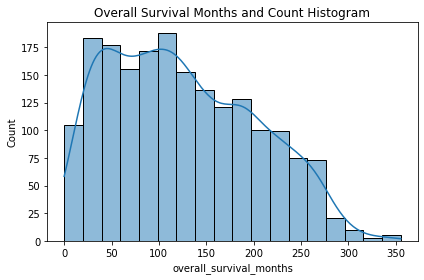

In [23]:
# Overall Survival Months and Count Histogram
plt.figure(figsize=(6, 4))
sns.histplot(df_clinical.overall_survival_months,kde=True)
plt.title('Overall Survival Months and Count Histogram')
plt.tight_layout()
plt.savefig('../OutputPlot/OverallSurvivalMonthesDistribution.pdf')
plt.show()

No handles with labels found to put in legend.


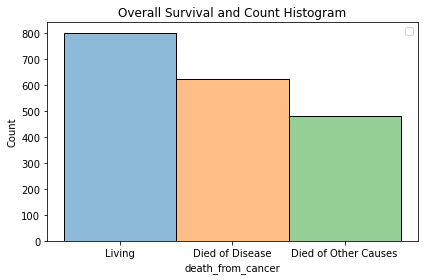

In [24]:
# Overall Survival/death_from_cancer and Count Histogram
plt.figure(figsize=(6, 4))
g = sns.histplot(x = 'death_from_cancer', hue='death_from_cancer',data = df_clinical)
plt.legend(loc=None)
plt.title('Overall Survival and Count Histogram')
plt.tight_layout()
plt.savefig('../OutputPlot/OverallSurvivalDistribution.pdf')
plt.show()

#### ER negative survival time is shorter

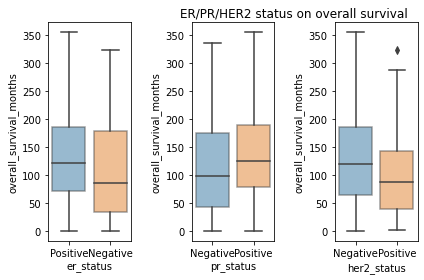

In [25]:
# example, ER, PR and HER2 status
fig, axes = plt.subplots(1, 3)
sns.boxplot(x="er_status", y="overall_survival_months", data=df_clinical, orient='v', boxprops=dict(alpha=.5),ax=axes[0])
sns.boxplot(x="pr_status", y="overall_survival_months", data=df_clinical, orient='v', boxprops=dict(alpha=.5),ax=axes[1])
sns.boxplot(x="her2_status", y="overall_survival_months", data=df_clinical, orient='v', boxprops=dict(alpha=.5),ax=axes[2])
plt.title('ER/PR/HER2 status on overall survival',x=-0.5)
plt.tight_layout()
plt.savefig('../OutputPlot/ER_PR_HER2_status.pdf')
plt.show()

#### There is a negative correlation between overall survival length and age at diagnosis

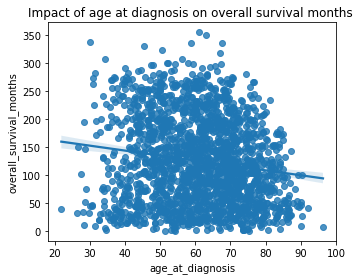

In [26]:
# example, age at diagnoss
plt.figure(figsize=(5, 4))
sns.regplot(x="age_at_diagnosis", y="overall_survival_months", data=df_clinical)
plt.title('Impact of age at diagnosis on overall survival months ')
plt.tight_layout()
plt.savefig('../OutputPlot/AgeAtDiagnosis.pdf')
plt.show()

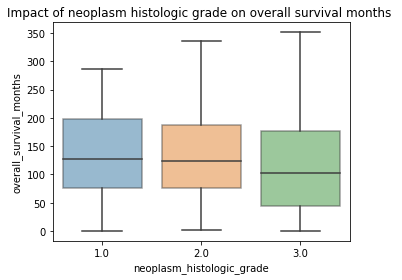

In [27]:
# example, tumor grade
plt.figure(figsize=(5, 4))
sns.boxplot(x="neoplasm_histologic_grade", y="overall_survival_months", data=df_clinical,boxprops=dict(alpha=.5))
plt.title('Impact of neoplasm histologic grade on overall survival months ')
plt.tight_layout()
plt.savefig('../OutputPlot/NeoplasmHistologicGrade.pdf')
plt.show()

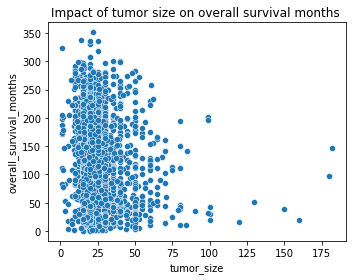

In [28]:
# example tumor size
plt.figure(figsize=(5, 4))
sns.scatterplot(x="tumor_size", y="overall_survival_months", data=df_clinical)
plt.title('Impact of tumor size on overall survival months ')
plt.tight_layout()
plt.savefig('../OutputPlot/TumorSize.pdf')
plt.show()

#### A correlation of survial with tumor stage is found

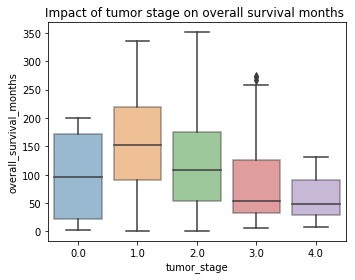

In [29]:
# 0.0 is missing value
# a nice correlation with tumor stage
plt.figure(figsize=(5, 4))
sns.boxplot(x="tumor_stage", y="overall_survival_months", data=df_clinical,boxprops=dict(alpha=.5))
plt.title('Impact of tumor stage on overall survival months ')
plt.tight_layout()
plt.savefig('../OutputPlot/TumorStage.pdf')
plt.show()

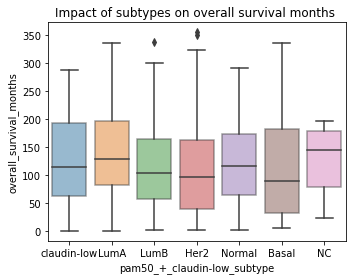

In [30]:
# 0.0 is missing value
# a nice correlation with tumor stage
plt.figure(figsize=(5, 4))
sns.boxplot(x="pam50_+_claudin-low_subtype", y="overall_survival_months", data=df_clinical,boxprops=dict(alpha=.5))
plt.title('Impact of subtypes on overall survival months ')
plt.tight_layout()
plt.savefig('../OutputPlot/Subtypes.pdf')
plt.show()

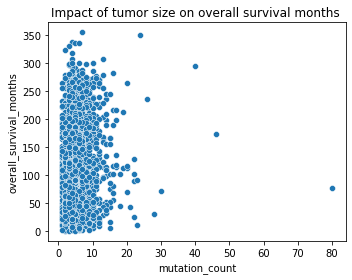

In [31]:
# example total mutation counts
plt.figure(figsize=(5, 4))
sns.scatterplot(x="mutation_count", y="overall_survival_months", data=df_clinical)
plt.title('Impact of tumor size on overall survival months ')
plt.tight_layout()
plt.savefig('../OutputPlot/MutationCount.pdf')
plt.show()

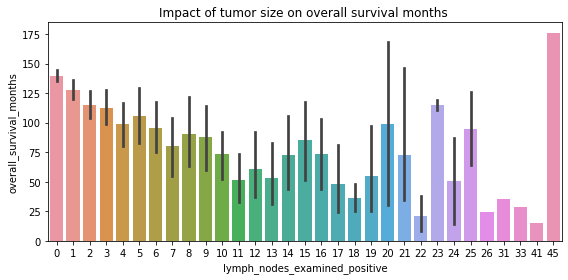

In [32]:
# example lymph_nodes_examined_positive
plt.figure(figsize=(8, 4))
sns.barplot(x="lymph_nodes_examined_positive", y="overall_survival_months",data=df_clinical)
plt.title('Impact of tumor size on overall survival months ')
plt.tight_layout()
plt.savefig('../OutputPlot/LymphNodePositive.pdf')
plt.show()

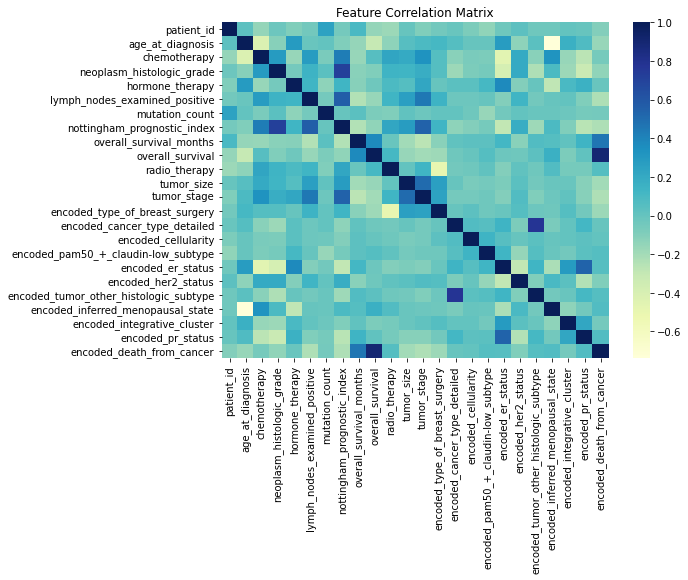

In [33]:
plt.figure(figsize=(10, 8))
correlation_matrix = df_clinical.corr().round(2)
sns.heatmap(correlation_matrix, cmap="YlGnBu")
plt.tight_layout()
plt.title('Feature Correlation Matrix')
plt.savefig('../OutputPlot/CorrelationMatrix.pdf')
plt.show()

###  nottingham prognostic index is calcuated from 
- the size of the tumour; 
- the number of involved lymph nodes; 
- the grade of the tumour
#### so probably should remove this from the feature list due to redundancy

### also remove death from cancer, this column is important if we want to know whether patients die of cancer or not, when the prediction is overall_survival

### remove patient id, and any other feature not required from this correlation matrix

In [34]:
df_clinical.to_csv('df_clinical_raw.csv',index=False)

In [35]:
# Filter for alive and death from cancer cases
df_clinical_filtered = df_clinical[df_clinical['death_from_cancer'] != 'Died of Other Causes']

In [36]:
df_clinical_survival_time_ML = df_clinical_filtered[['age_at_diagnosis','chemotherapy','neoplasm_histologic_grade',
                             'hormone_therapy','lymph_nodes_examined_positive','mutation_count',
                            'overall_survival_months','radio_therapy','tumor_size','tumor_stage',
                            'encoded_type_of_breast_surgery','encoded_cancer_type_detailed',
                            'encoded_cellularity','encoded_pam50_+_claudin-low_subtype',
                            'encoded_er_status','encoded_her2_status','encoded_tumor_other_histologic_subtype',
                            'encoded_inferred_menopausal_state','encoded_integrative_cluster',
                            'encoded_pr_status']]

In [37]:
df_clinical_survival_time_ML.to_csv('df_clinical_survival_time_ML.csv',index=False)

In [38]:
#overall survial as 0 or 1
df_clinical_survial_ML = df_clinical_filtered[['age_at_diagnosis','chemotherapy','neoplasm_histologic_grade',
                             'hormone_therapy','lymph_nodes_examined_positive','mutation_count',
                            'overall_survival','radio_therapy','tumor_size','tumor_stage',
                            'encoded_type_of_breast_surgery','encoded_cancer_type_detailed',
                            'encoded_cellularity','encoded_pam50_+_claudin-low_subtype',
                            'encoded_er_status','encoded_her2_status','encoded_tumor_other_histologic_subtype',
                            'encoded_inferred_menopausal_state','encoded_integrative_cluster',
                            'encoded_pr_status']]

In [39]:
df_clinical_survial_ML.to_csv('df_clinical_survival_ML.csv',index=False)